In this notebook we test the $\epsilon$-greedy solution to the k-armed bandit

In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [335]:
#Number of bandits
k=10

#Time steps in each game
T = 1000

#Repetitions of the game
N = 2000

In [336]:
def initialise_values(k):
    #Define the value function of the k actions sampling from the Gaussian distribution N(0,1)
    return [np.random.normal(0,1) for _ in range(k)]


def select_greedy(epsilon):
    #return 1 for successes, 0 for losses
    return np.random.binomial(1,epsilon)
    

def play(values, epsilon =0.1,var=1):
    
    x = select_greedy(epsilon)
    if x==0:
        action = values.index(max(values)) 
    else:
        action = np.random.randint(len(values))
        
    return action
       
    
def run(k, epsilon =0.1,var=1, n_steps=T):
    
    #Initiliase vector of true value functions
    true_values = initialise_values(k)
    optimal_action = true_values.index(max(true_values))
    
    #Initiliase vector of estimated value functions
    current_values = initialise_values(k)
    
    reward = [0]
    optimal = [0]
    n_pull = [0]*k
    
    for n in range(1,n_steps):
        #Select lever
        action = play(current_values, epsilon, var)
        
        if action == optimal_action:
            optimal.append(1)
        else:
            optimal.append(0)
       
        #Extract reward and store it
        r = np.random.normal(true_values[action],1)
        reward.append(r)
        
        #Increase n of pulls for selected lever
        n_pull[action] +=1
        n = n_pull[action]
        
        #Update selected lever value function
        current_values[action]= (n*current_values[action] + r)/(n+1) 
        
        
    return reward, optimal
    

####  Play game N  times

In [342]:
e =[]
op = []
for epsilon in [0,0.01,0.1]:
    x1, x2 = sum([np.array(run(k,  epsilon)) for _ in range(N)])/N
    e.append(x1)
    op.append(x2)

### Plot average reward over N repetitions of the game

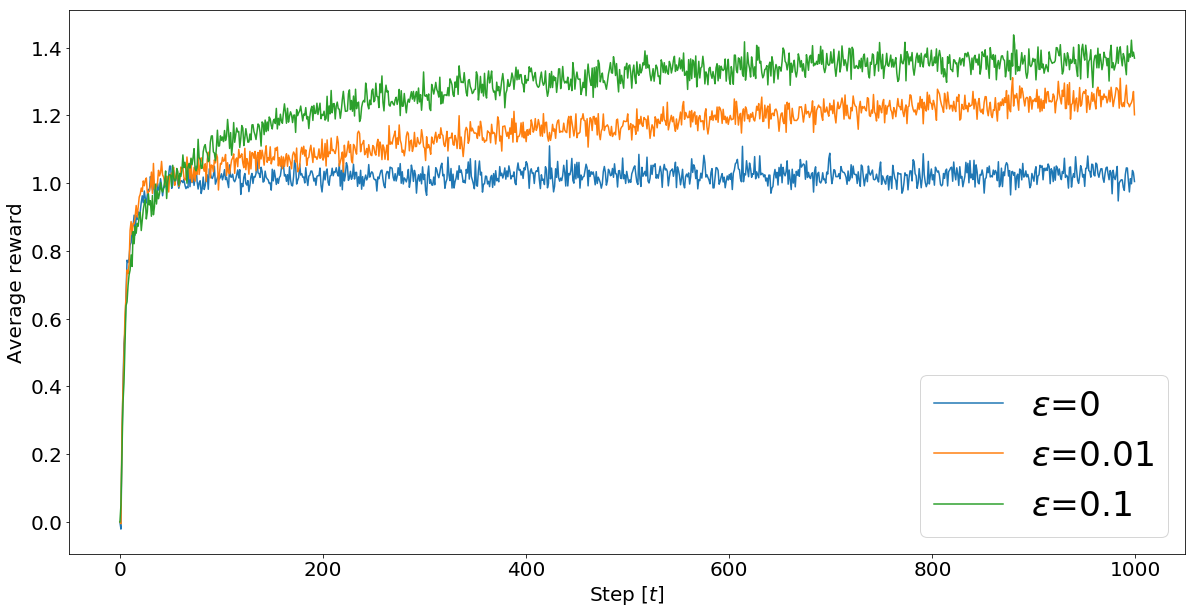

In [343]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Step [$t$]')
plt.ylabel('Average reward')
plt.plot(e[0], label='$\epsilon$=0')
plt.plot(e[1], label='$\epsilon$=0.01')
plt.plot(e[2],  label='$\epsilon$=0.1')
plt.legend(loc = 4, fontsize ='xx-large')

 As it can be seen, the pure greedy policy gives a lower average reward in the long run. This is because for some run the max reward lever remains unpulled - especially likely when the initialisation produces a very low reward. 

### Plot % optimal action chosen over N repetitions of the game

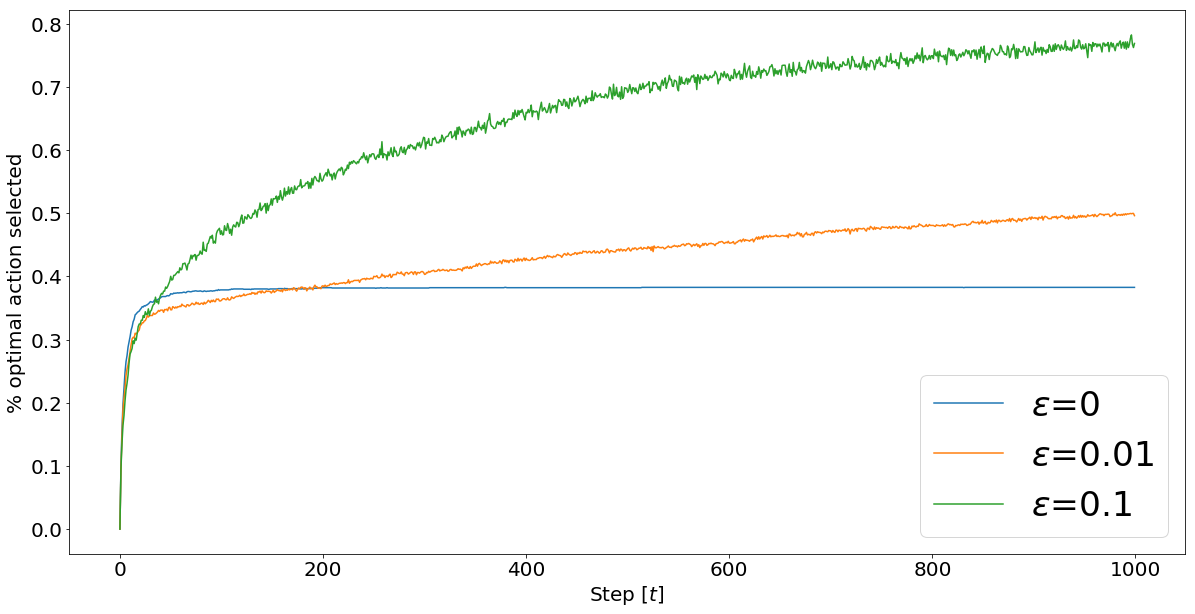

In [344]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Step [$t$]')
plt.ylabel('% optimal action selected')
plt.plot(op[0], label='$\epsilon$=0')
plt.plot(op[1], label='$\epsilon$=0.01')
plt.plot(op[2],  label='$\epsilon$=0.1')
plt.legend(loc = 4, fontsize ='xx-large')

### Dynamic version

Here we study the case of dynamic evolution of the  value function - ex n. 2.5 Sutton

In [349]:
def update_random_walk(x, mean, var):
    return x+np.random.normal(mean, var)


def run_dynamic(k, epsilon =0.1,var=1, n_steps=T):
    
    #Initiliase vector of true value functions all same value
    true_values = [np.random.normal(0,1)]*k
    optimal_action = true_values.index(max(true_values))
    
    #Initiliase vector of estimated value functions
    current_values = initialise_values(k)
    
    reward = [0]
    optimal = [0]
    n_pull = [0]*k
    
    for n in range(1,n_steps):
        #Select lever
        action = play(current_values, epsilon, var)
        
        if action == optimal_action:
            optimal.append(1)
        else:
            optimal.append(0)
       
        #Extract reward and store it
        r = np.random.normal(true_values[action],1)
        reward.append(r)
        
        #Increase n of pulls for selected lever
        n_pull[action] +=1
        n = n_pull[action]
        
        #Update selected lever value function
        current_values[action]= (n*current_values[action] + r)/(n+1) 
        
        #Dynamic update of the value function
        true_values = [update_random_walk(x, 0,0.01) for x in true_values]
        
        
    return reward, optimal

In [350]:
Nd = 10000
rew, opt = sum([np.array(run_dynamic(k,  0.1)) for _ in range(Nd)])/Nd

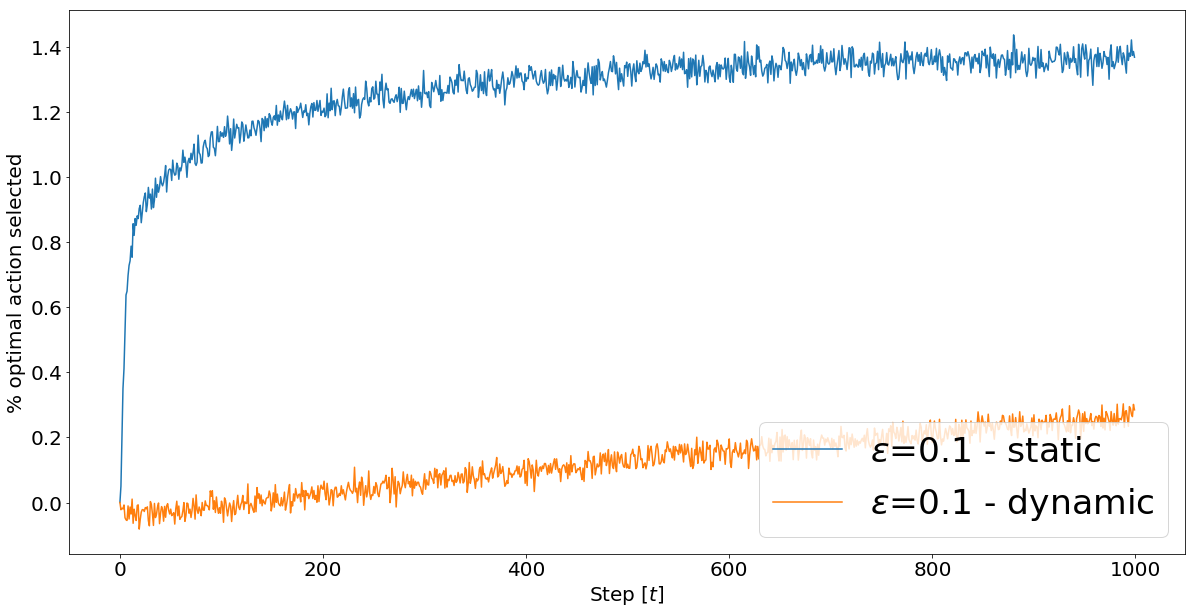

In [351]:
plt.figure(figsize = (20,10))
plt.rcParams.update({'font.size': 20})
plt.xlabel('Step [$t$]')
plt.ylabel('% optimal action selected')
plt.plot(e[2], label='$\epsilon$=0.1 - static')
plt.plot(rew, label='$\epsilon$=0.1 - dynamic')
plt.legend(loc = 4, fontsize ='xx-large')